# Results R1a: What sentiments and topics are present in the diary chunks (single level)?

## Resources

In [48]:
# Get Packages & Libraries
library(tidyverse)
library(rethinking)
library(ggridges)

In [3]:
# Functions
factorize <- function(df){ # Create a function
  for(i in which(sapply(df, class) == "character")) # that looks for variables with the character class 
      df[[i]] = as.factor(df[[i]]) # and converts them to factor (i.e., categorical) class
  return(df)
}

In [4]:
# Get Data
# View Data
df2  <- read.csv("20240702_PhD_FinalData-DiaryChk.csv")
df2[df2 == ''] <- NA #replace blank cells with NA
df2 <- factorize(df2)
colnames(df2)

[1] "docid"            "docyear"          "docmonth"         "authorName"      
 [5] "docauthorid"      "authorLocation"   "authorGender"     "nationalOrigin"  
 [9] "irish"            "otherUK"          "relMin"           "catholic"        
[13] "otherChristian"   "U"                "M"                "S"               
[17] "F"                "L"                "text"             "sequence"        
[21] "totalTokens"      "uniqueTokens"     "lexicalDiversity" "scoreNeg"        
[25] "scoreNeu"         "scorePos"         "scoreCom"         "chunks"          
[29] "position"         "topicNumber"      "mentsDis"         "mentsTot"        
[33] "indsTot"          "fppAll_Ct"        "fppSub_Ct"        "fppObj_Ct"       
[37] "mentsTotFULL"     "indsTotFULL"      "fppAll_CtFULL"    "fppSub_CtFULL"   
[41] "fppObj_CtFULL"

## Sentiment

The composite sentiment scores for the housewife are not normally distributed because her texts lack proper sentence grammar, especially periods, as shown below. 

docid,min,mean,max,sd
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
D0002,-0.9916000,-0.17930252,0.9886000,0.5117184
D0003,-0.1437333,0.08773990,0.6323500,0.1130969
D0007,-0.3999000,-0.02004793,0.3183571,0.1094423
D0009,-0.2258500,0.03078770,0.4502333,0.1086464


Picking joint bandwidth of 0.0562

Saving 7 x 7 in image
Picking joint bandwidth of 0.0562



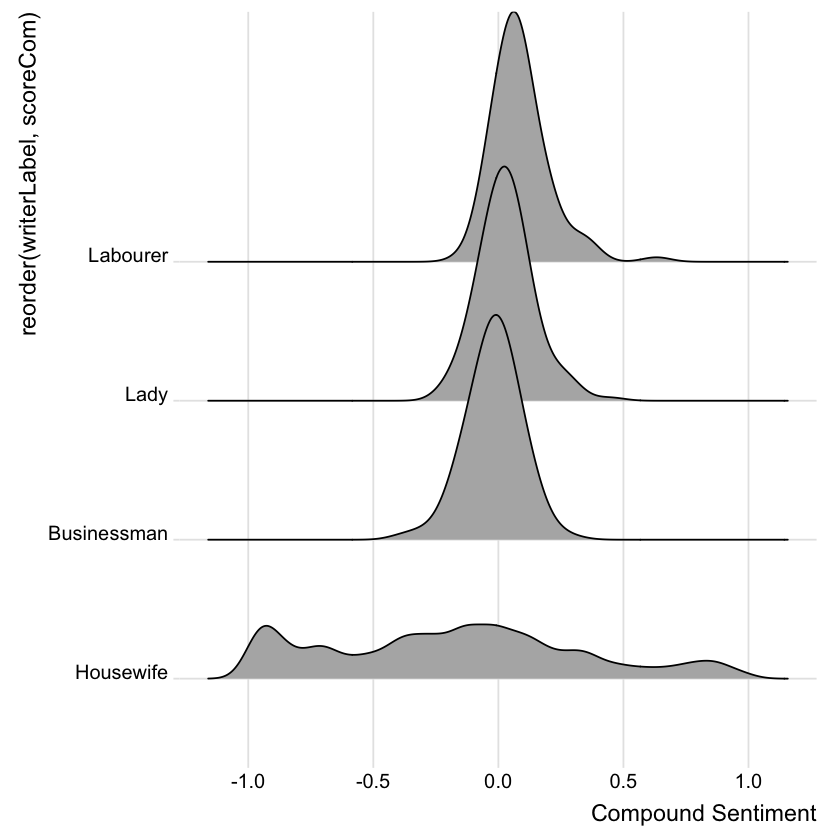

In [9]:
df2 %>% 
select(docid, scoreCom) %>% 
group_by(docid) %>% 
summarize(min = min(scoreCom),
          mean = mean(scoreCom), 
          max = max(scoreCom), 
          sd = sd(scoreCom))

actualData <- df2 %>% 
select(docid, scoreCom) 

actualData$writerLabel[actualData$docid=="D0002"] <- "Housewife"
actualData$writerLabel[actualData$docid=="D0003"] <- "Labourer"
actualData$writerLabel[actualData$docid=="D0007"] <- "Businessman"
actualData$writerLabel[actualData$docid=="D0009"] <- "Lady"

ggplot(actualData, aes(x = scoreCom, y = reorder(writerLabel, scoreCom))) +
  geom_density_ridges() +
theme_ridges() + 
  theme(legend.position = "none") + 
xlab("Compound Sentiment") 

ggsave("20241213_sent_actual-dist.jpg")

Instead, a variable reflecting net valence score will be constructed from the raw scoreNeg and scorePos values, which do not rely on punctuation and therefore have similar distributions across all authors. This variable will serve as the outcome variable and will therefore be modelled using the Bayesian method.

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.002333 0.029606 0.048000 0.051768 0.067371 0.218500 

[1] 0.02983158

docid,min,mean,max,sd
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
D0002,0.002333333,0.05098707,0.2185000,0.03087968
D0003,0.007166667,0.05704568,0.1652727,0.02958772
D0007,0.004150000,0.05223002,0.1950000,0.02938419
D0009,0.004562500,0.04952406,0.1283750,0.02754749


Picking joint bandwidth of 0.00868



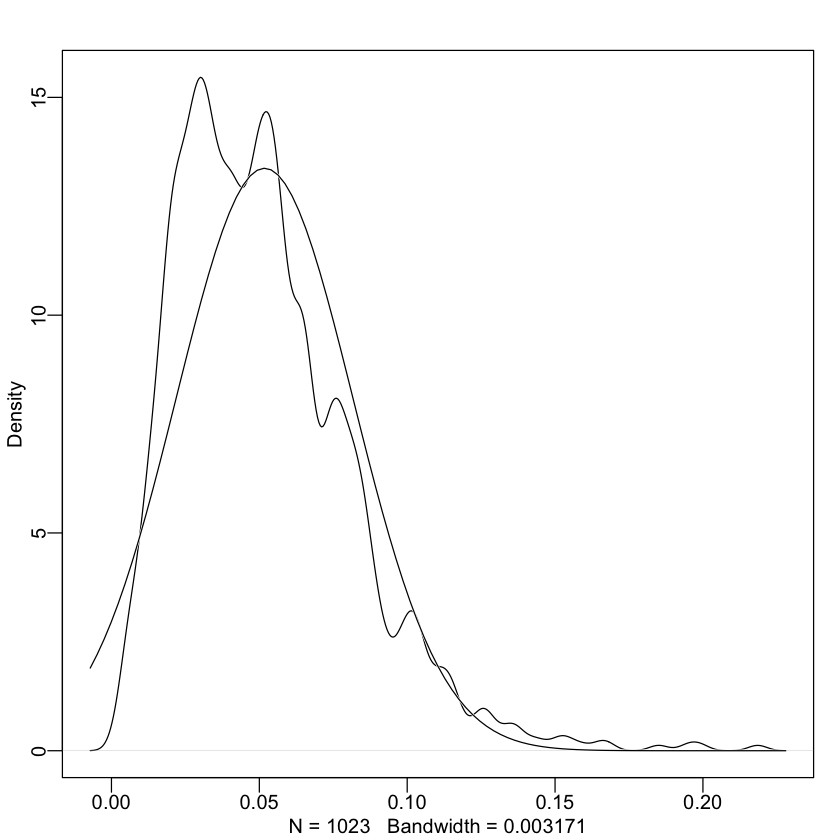

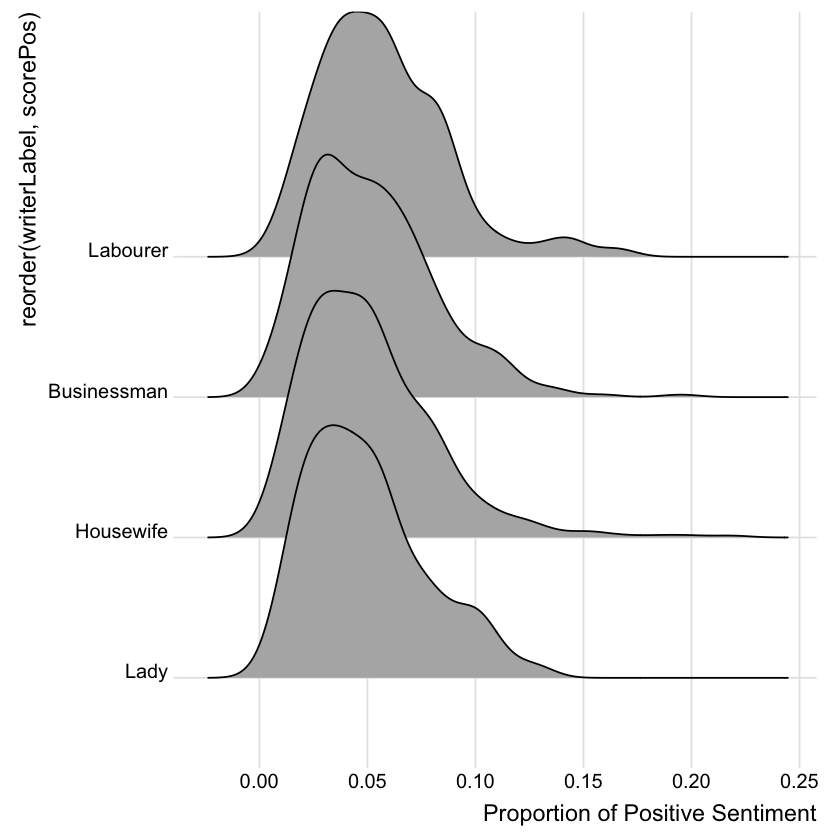

In [6]:
dens(df2$scorePos, norm.comp = TRUE)
summary(df2$scorePos)
sd(df2$scorePos)

df2 %>% 
select(docid, scorePos) %>% 
group_by(docid) %>% 
summarize(min = min(scorePos),
          mean = mean(scorePos), 
          max = max(scorePos), 
          sd = sd(scorePos))

actualData <- df2 %>% 
select(docid, scorePos) 

actualData$writerLabel[actualData$docid=="D0002"] <- "Housewife"
actualData$writerLabel[actualData$docid=="D0003"] <- "Labourer"
actualData$writerLabel[actualData$docid=="D0007"] <- "Businessman"
actualData$writerLabel[actualData$docid=="D0009"] <- "Lady"

ggplot(actualData, aes(x = scorePos, y = reorder(writerLabel, scorePos))) +
  geom_density_ridges() +
theme_ridges() + 
  theme(legend.position = "none") + 
xlab("Proportion of Positive Sentiment") 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.02537 0.04367 0.05030 0.06900 0.22700 

[1] 0.03394424

docid,min,mean,max,sd
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
D0002,0,0.05902629,0.22700000,0.03710265
D0003,0,0.02682556,0.09047619,0.02076101
D0007,0,0.05062308,0.20285714,0.03007978
D0009,0,0.03965387,0.13963636,0.02843983


Picking joint bandwidth of 0.00819



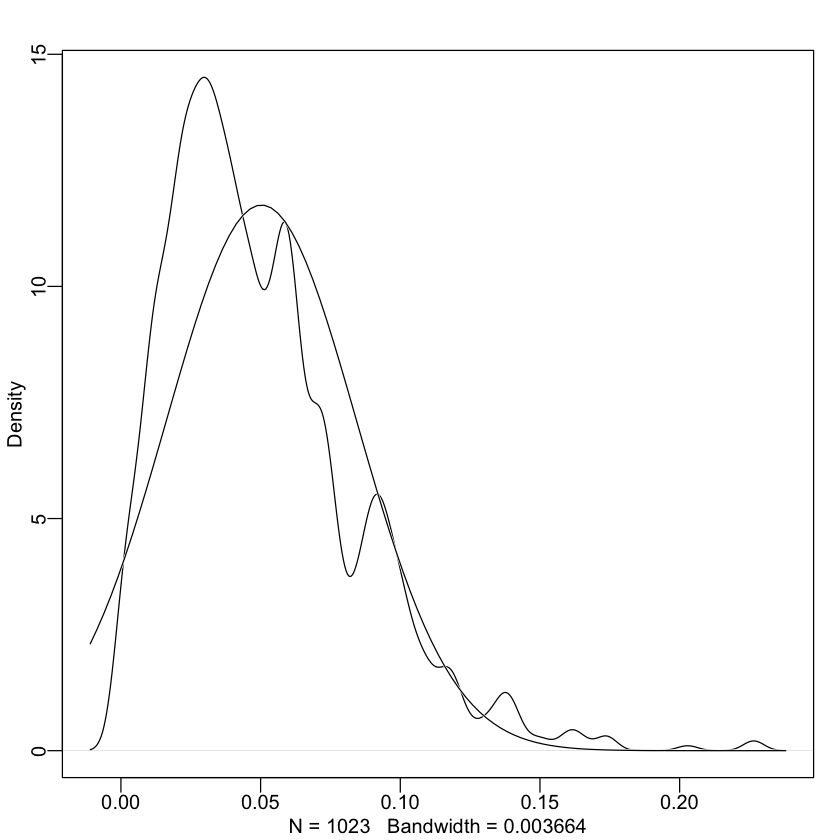

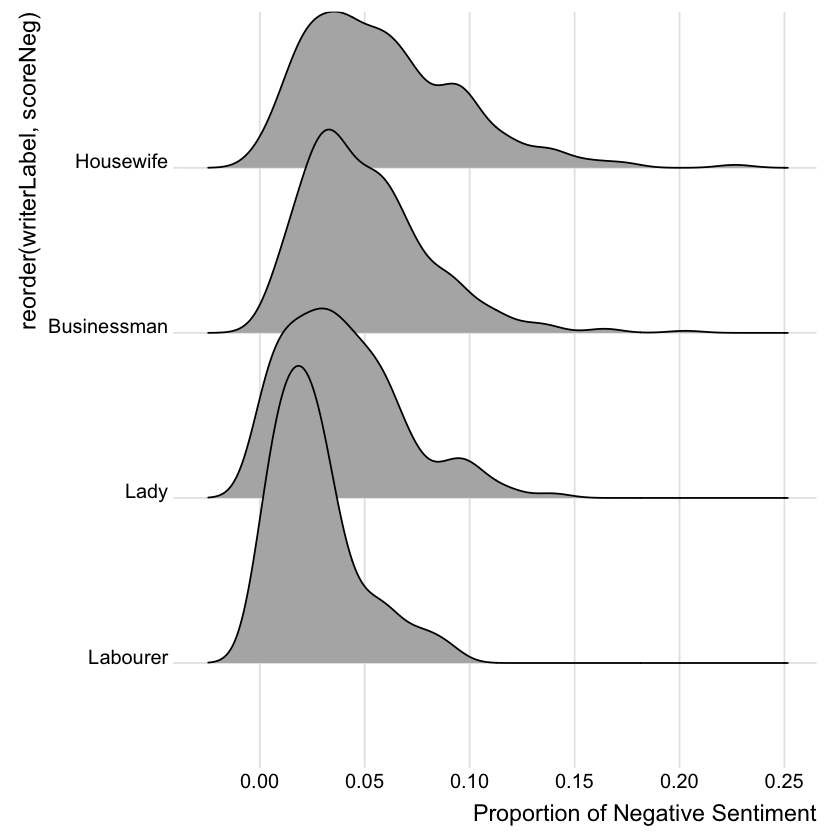

In [7]:
dens(df2$scoreNeg, norm.comp = TRUE)
summary(df2$scoreNeg)
sd(df2$scoreNeg)

df2 %>% 
select(docid, scoreNeg) %>% 
group_by(docid) %>% 
summarize(min = min(scoreNeg),
          mean = mean(scoreNeg), 
          max = max(scoreNeg), 
          sd = sd(scoreNeg))

actualData <- df2 %>% 
select(docid, scoreNeg) 

actualData$writerLabel[actualData$docid=="D0002"] <- "Housewife"
actualData$writerLabel[actualData$docid=="D0003"] <- "Labourer"
actualData$writerLabel[actualData$docid=="D0007"] <- "Businessman"
actualData$writerLabel[actualData$docid=="D0009"] <- "Lady"

ggplot(actualData, aes(x = scoreNeg, y = reorder(writerLabel, scoreNeg))) +
  geom_density_ridges() +
theme_ridges() + 
  theme(legend.position = "none") + 
xlab("Proportion of Negative Sentiment") 

To make this variable, I subtract the raw negative score from the raw positive score. These scores reflect the proportions of a unit of text that are classified as negative or positive by the Vader lexicon. Because the values are all very small, I multiply them by a constant -- 20 -- to arrive at greater variance, which will improve model fit. 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.86000 -0.56000  0.05000  0.02929  0.60000  3.69000 

[1] 0.9523207

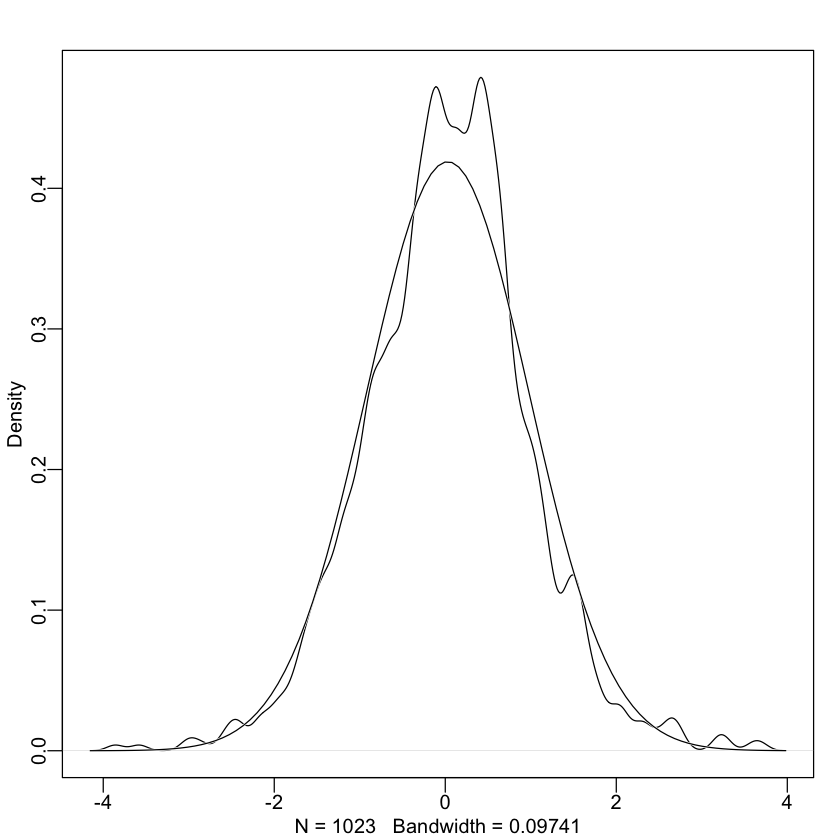

In [5]:
# Net Valence
df2$valence <- (df2$scorePos-df2$scoreNeg)*20 # Multiplying by a constant to aid model fitting
dens(df2$valence, norm.comp=TRUE)
summary(df2$valence)
sd(df2$valence)

docid,min,mean,max,sd
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
D0002,-3.860000,-0.16078444,3.690000,1.0125048
D0003,-1.220952,0.60440228,3.223636,0.7571557
D0007,-2.842500,0.03213869,3.198462,0.9046606
D0009,-2.198182,0.19740389,2.470000,0.7918597


Picking joint bandwidth of 0.237

Saving 7 x 7 in image
Picking joint bandwidth of 0.237



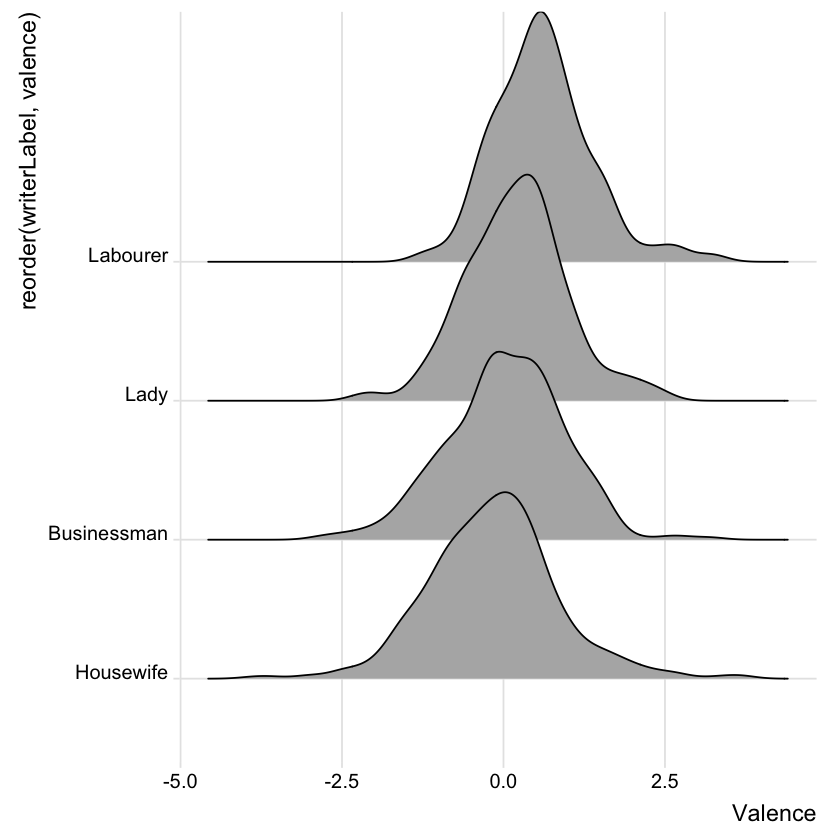

In [10]:
df2 %>% 
select(docid, valence) %>% 
group_by(docid) %>% 
summarize(min = min(valence),
          mean = mean(valence), 
          max = max(valence), 
          sd = sd(valence))

actualData <- df2 %>% 
select(docid, valence) 

actualData$writerLabel[actualData$docid=="D0002"] <- "Housewife"
actualData$writerLabel[actualData$docid=="D0003"] <- "Labourer"
actualData$writerLabel[actualData$docid=="D0007"] <- "Businessman"
actualData$writerLabel[actualData$docid=="D0009"] <- "Lady"

ggplot(actualData, aes(x = valence, y = reorder(writerLabel, valence))) +
  geom_density_ridges() +
theme_ridges() + 
  theme(legend.position = "none") + 
xlab("Valence") 

ggsave("20241213_val_actual-dist.jpg")

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.56155 -0.82020 -0.01381 -0.01528  0.80133  4.07693 

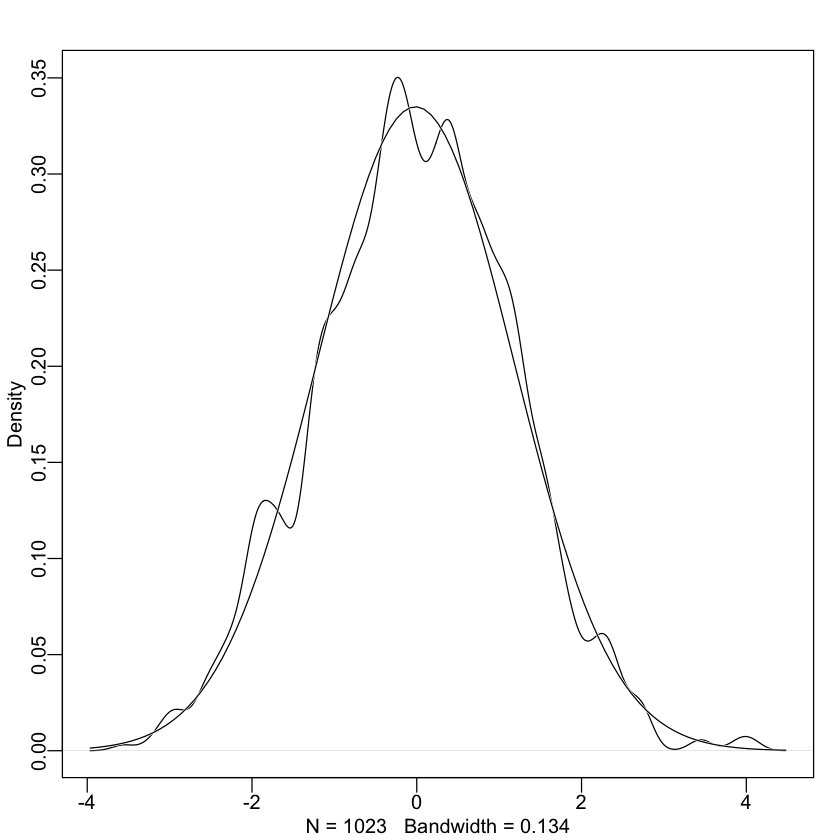

In [10]:
# Prior Predictive Check
sample_mu <- rnorm( 1023 , 0 , 1)
sample_sigma <- runif( 1023 , 0 , 1)
prior_h <- rnorm( 1023 , sample_mu , sample_sigma )
dens(prior_h, norm.comp = TRUE)
summary(prior_h)

<h3>Model Specification</h3>

$$sentiment_{i} \sim Normal(\mu, \sigma)$$
$$\mu \sim Normal(0,1)$$
$$\sigma \sim Uniform(0,1)$$

See McElreath (2020, p. 82), 20190117_PM_Slides.pdf (slides 7-8) for model specification.

In [7]:
# Define the model
#m1 <- alist(valence ~ dnorm(mu,sigma),
#            mu ~ dnorm(0,1),
#            sigma ~ dunif(0,1)
#)

#f1 <- quap(m1,data=df2)

m1 <- readRDS("20241010_PhD_DiaChkSen_01.rds")
summary(m1)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
mu,0.02926731,0.02974685,-0.0182739,0.07680851
sigma,0.95185539,0.02104341,0.9182239,0.98548683


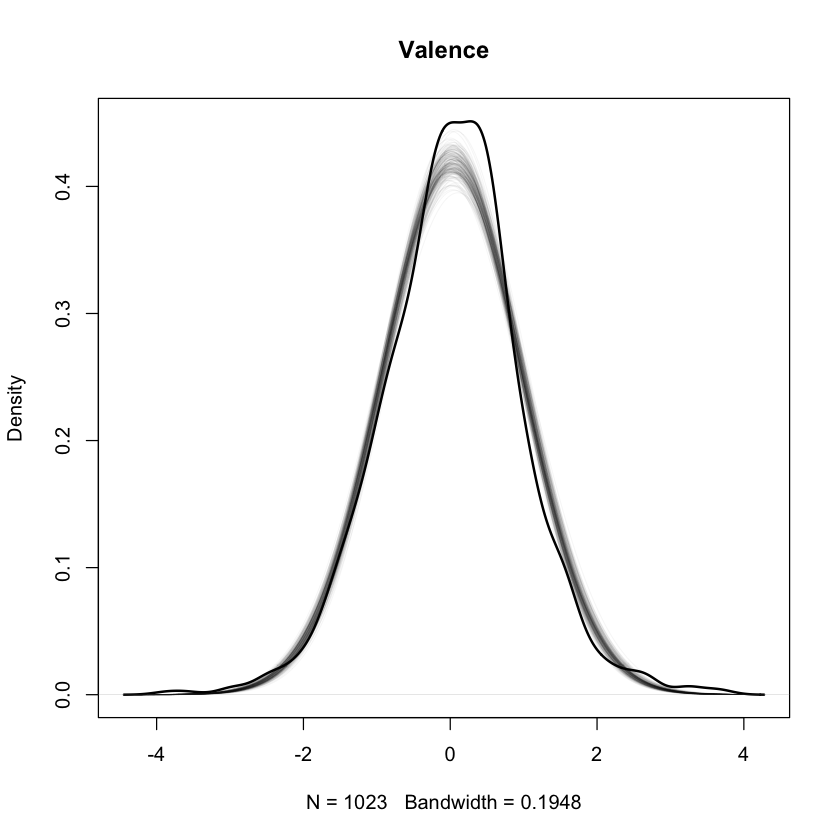

In [8]:
# Get coefficients
mu_fit <- coef(m1)[[1]]
sigma_fit <- coef(m1)[[2]]

# draw 5000 samples from the joint posterior
coef_samp <- extract.samples(m1,5000)
# convert to dataframe
coef_samp <- as.data.frame(coef_samp)

# actual data
den <- density(df2$valence)
plot(den,lwd=2,,main="Valence")

# samples from the posterior
for(i in 1:200){
    y_fit <- dnorm(den$x,coef_samp[i,1],coef_samp[i,2])
    lines(den$x,y_fit,lwd=.5,col='#00000010')    
}

In [13]:
saveRDS(f1, file = "20241010_PhD_DiaChkSen_01.rds")

## Predictor Variables

### Sentiment

A third variable gives the proportion of terms that have a neutral score in the Vader lexicon. This variable reflects arousal. Imagine two units of text, one made up of 10% neg, 70% neu and 20% pos terms, and the other of 40% neg, 10% neu, and 50% pos. Both have net valence scores of 10; however, the second reflects less neutrality and therefore more arousal. 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.7068  0.8724  0.9030  0.8975  0.9267  0.9818 

[1] 0.04293774

docid,min,mean,max,sd
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
D0002,0.7246667,0.8899756,0.98000,0.04578152
D0003,0.8237778,0.9146874,0.98025,0.03564128
D0007,0.7067692,0.8964116,0.97725,0.03953719
D0009,0.8148333,0.9108082,0.98180,0.03959864


Picking joint bandwidth of 0.0119



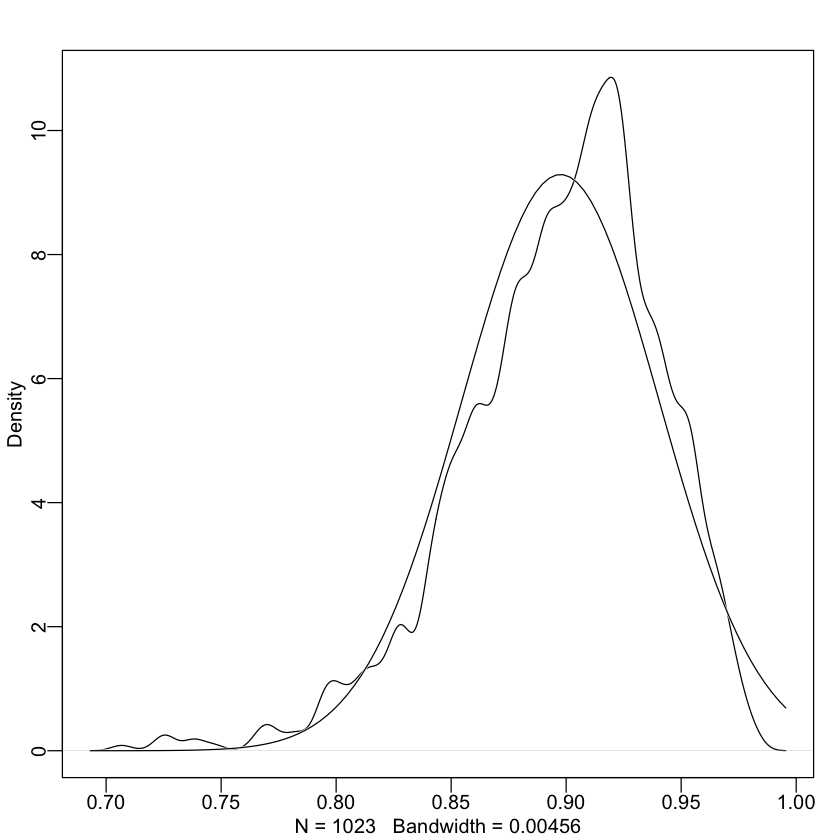

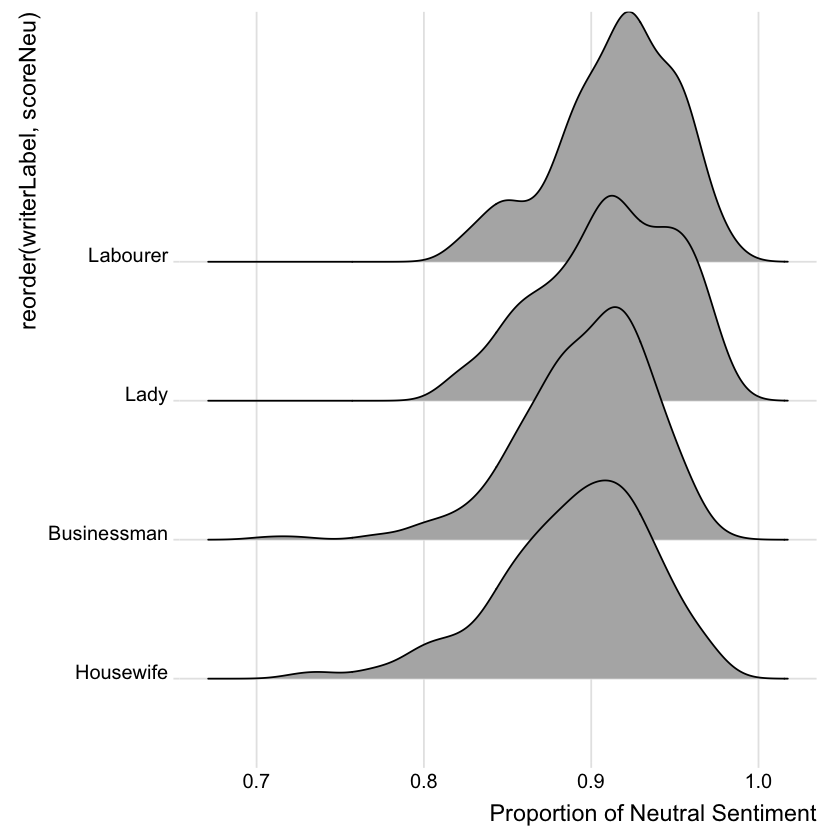

In [14]:
dens(df2$scoreNeu, norm.comp = TRUE)
summary(df2$scoreNeu)
sd(df2$scoreNeu)

df2 %>% 
select(docid, scoreNeu) %>% 
group_by(docid) %>% 
summarize(min = min(scoreNeu),
          mean = mean(scoreNeu), 
          max = max(scoreNeu), 
          sd = sd(scoreNeu))

actualData <- df2 %>% 
select(docid, scoreNeu) 

actualData$writerLabel[actualData$docid=="D0002"] <- "Housewife"
actualData$writerLabel[actualData$docid=="D0003"] <- "Labourer"
actualData$writerLabel[actualData$docid=="D0007"] <- "Businessman"
actualData$writerLabel[actualData$docid=="D0009"] <- "Lady"

ggplot(actualData, aes(x = scoreNeu, y = reorder(writerLabel, scoreNeu))) +
  geom_density_ridges() +
theme_ridges() + 
  theme(legend.position = "none") + 
xlab("Proportion of Neutral Sentiment") 

I transform this variable by subtracting it from 1 to obtain the proportion of the unit of text that carries emotion, either positive or negative, or in other words is emotionally charged, or not neutral.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0182  0.0733  0.0970  0.1025  0.1276  0.2932 

[1] 0.04293774

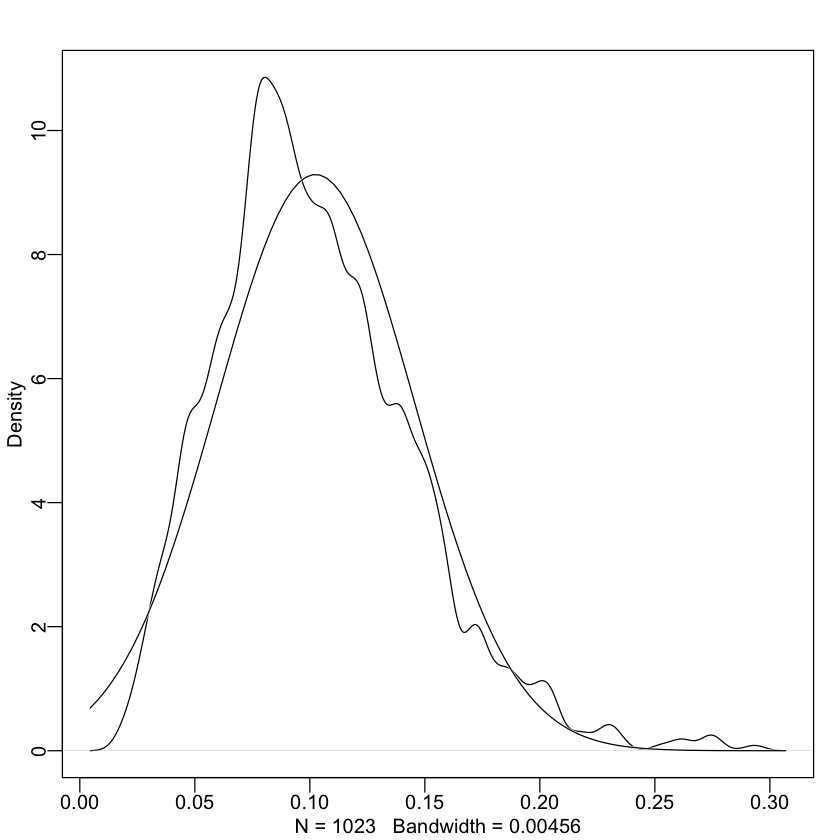

In [12]:
# Amount of emotion
df2$arousal <- df2$scoreNeu # Proportion of neutral terms = level of neutrality
df2$arousal <- 1-df2$arousal # Proportion of non-neutral terms = level of arousal
dens(df2$arousal, norm.comp = TRUE)
summary(df2$arousal)
sd(df2$arousal)

,min,mean,max,sd
,<dbl>,<dbl>,<dbl>,<dbl>
D0002,0.02000,0.11002436,0.2753333,0.04578152
D0007,0.02275,0.10358836,0.2932308,0.03953719
D0009,0.01820,0.08919184,0.1851667,0.03959864
D0003,0.01975,0.08531258,0.1762222,0.03564128


Picking joint bandwidth of 0.0119



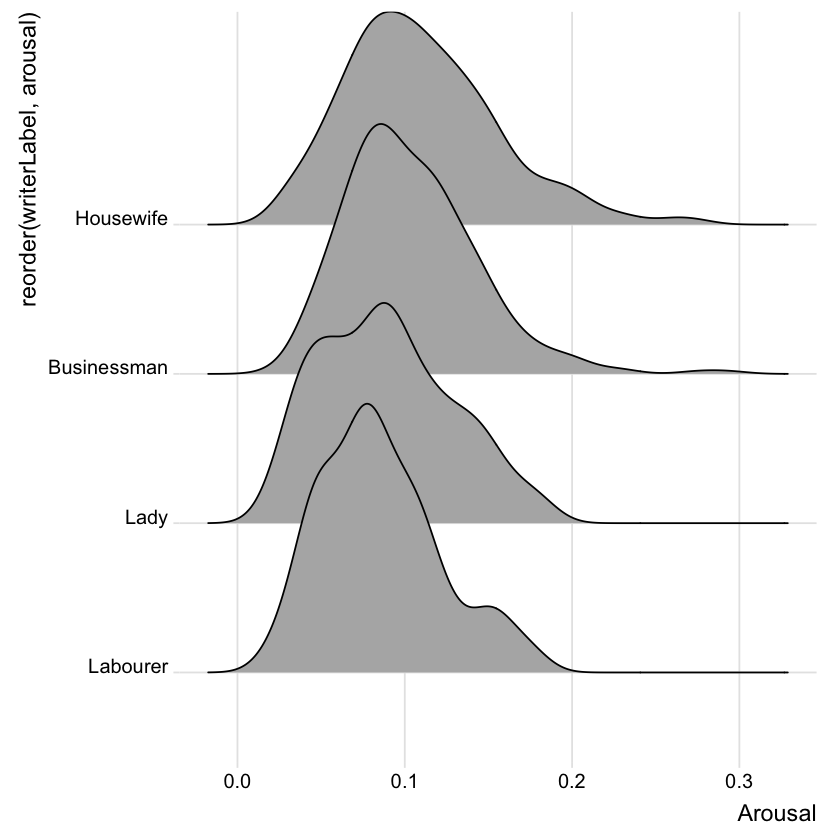

In [44]:
arousal <- df2 %>% 
select(docid, arousal) %>% 
group_by(docid) %>% 
summarize(min = min(arousal),
          mean = mean(arousal), 
          max = max(arousal), 
          sd = sd(arousal)) %>%
column_to_rownames(var = "docid") %>%
arrange(desc(mean))

arousal

actualData <- df2 %>% 
select(docid, arousal) 

actualData$writerLabel[actualData$docid=="D0002"] <- "Housewife"
actualData$writerLabel[actualData$docid=="D0003"] <- "Labourer"
actualData$writerLabel[actualData$docid=="D0007"] <- "Businessman"
actualData$writerLabel[actualData$docid=="D0009"] <- "Lady"

ggplot(actualData, aes(x = arousal, y = reorder(writerLabel, arousal))) +
  geom_density_ridges() +
theme_ridges() + 
  theme(legend.position = "none") + 
xlab("Arousal")

## Topics


  0   1   2   3   4   5   6   7   8   9 
135 111 100 144 107  71  89 109  93  64 

topicLabel,n,pct
<fct>,<dbl>,<dbl>
04 Girl Privilege,144,0.14
01 Housework,135,0.13
02 Places,111,0.11
08 Politics,109,0.11
05 Working Boy,107,0.10
03 Business,100,0.10
09 Outback,93,0.09
07 People,89,0.09
06 Weather,71,0.07


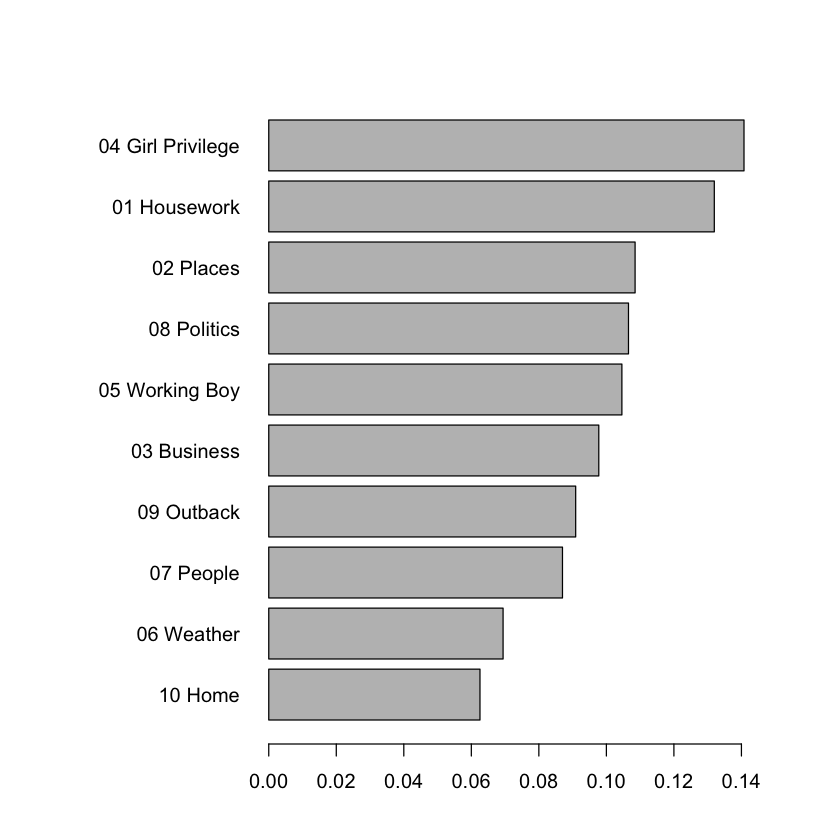

In [67]:
# Get counts for topic number
table(as.factor(df2$topicNumber))

# Create new variable with topic labels that match pyLDAvis label numbers
df2$topicLabel <- as.character(df2$topicNumber)
df2$topicLabel[df2$topicLabel=="0"]  <- "01 Housework"
df2$topicLabel[df2$topicLabel=="1"]  <- "02 Places"
df2$topicLabel[df2$topicLabel=="2"]  <- "03 Business"
df2$topicLabel[df2$topicLabel=="3"]  <- "04 Girl Privilege"
df2$topicLabel[df2$topicLabel=="4"]  <- "05 Working Boy"
df2$topicLabel[df2$topicLabel=="5"]  <- "06 Weather"
df2$topicLabel[df2$topicLabel=="6"]  <- "07 People"
df2$topicLabel[df2$topicLabel=="7"]  <- "08 Politics"
df2$topicLabel[df2$topicLabel=="8"]  <- "09 Outback"
df2$topicLabel[df2$topicLabel=="9"]  <- "10 Home"
df2$topicLabel <- as.factor(df2$topicLabel)

#Check 
df2 %>% 
group_by(topicLabel) %>% 
count() %>% mutate(pct=n/nrow(df2)) %>% 
arrange(desc(pct)) %>%
mutate(across(where(is.numeric), round, 2))

# Visualize
par(mar=(c(4,11,4,4)))
barplot(prop.table(sort(table(df2$topicLabel), decreasing = FALSE)), horiz = TRUE, las=1)

In [27]:
table(df2$topicLabel, df2$docauthorid)

                   
                    D0002 D0003 D0007 D0009
  01 Housework        131     0     0     4
  02 Places             0     0   111     0
  03 Business           0     0   100     0
  04 Girl Privilege     5     0     0   139
  05 Working Boy        2   100     0     5
  06 Weather           69     0     2     0
  07 People            88     0     1     0
  08 Politics           0     0   109     0
  09 Outback           91     0     0     2
  10 Home              61     2     0     1

## Socials

### External Person Mentions

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.003704 0.027675 0.037415 0.039257 0.048689 0.111913 

[1] 0.01616384

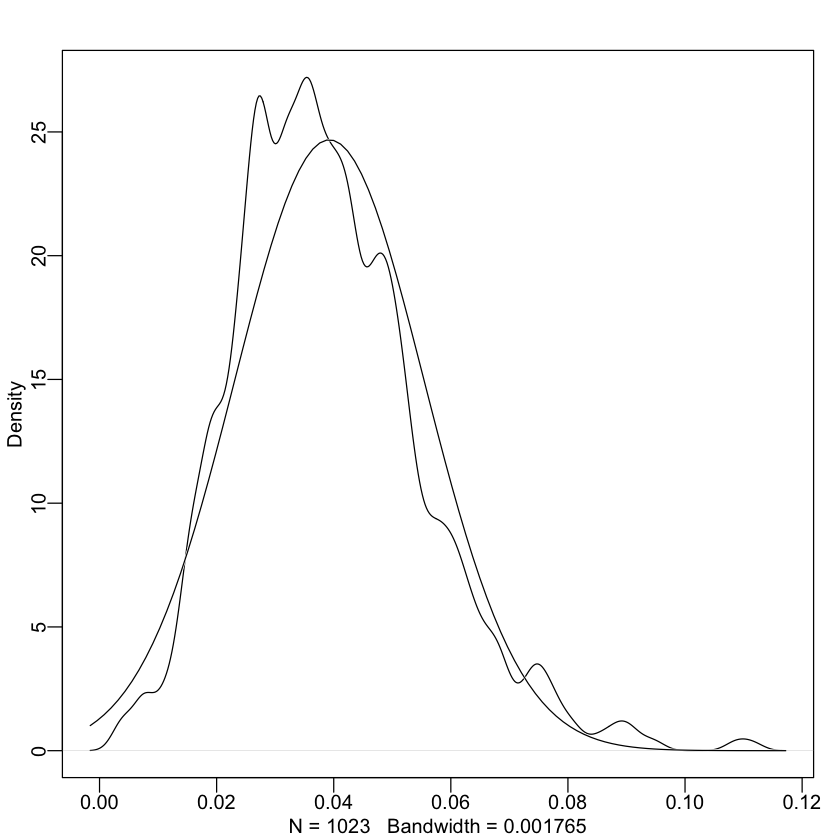

In [46]:
# Create a new token that reflects the rate of total individuals relative to total tokens
df2$mentsRate <- df2$mentsTot/df2$totalTokens
summary(df2$mentsRate)
dens(df2$mentsRate,norm.comp=TRUE)
sd(df2$mentsRate)

,min,mean,max,sd
,<dbl>,<dbl>,<dbl>,<dbl>
D0002,0.013513514,0.04612152,0.10989011,0.015820286
D0009,0.010676157,0.04270003,0.11191336,0.016258728
D0007,0.003703704,0.03119050,0.07692308,0.012755941
D0003,0.006493506,0.02961932,0.05944056,0.009951083


Picking joint bandwidth of 0.0038

Saving 7 x 7 in image
Picking joint bandwidth of 0.0038



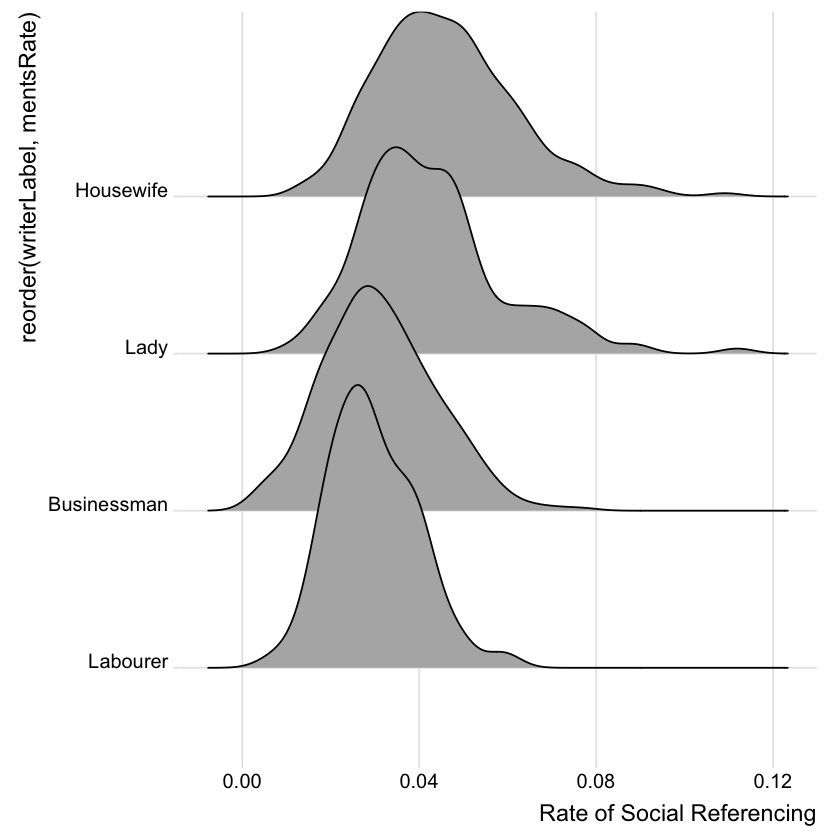

In [56]:
mentsRate <- df2 %>% 
select(docid, mentsRate) %>% 
group_by(docid) %>% 
summarize(min = min(mentsRate),
          mean = mean(mentsRate), 
          max = max(mentsRate), 
          sd = sd(mentsRate)) %>%
column_to_rownames(var = "docid") %>%
arrange(desc(mean))

mentsRate


actualData <- df2 %>% 
select(docid, mentsRate) 

actualData$writerLabel[actualData$docid=="D0002"] <- "Housewife"
actualData$writerLabel[actualData$docid=="D0003"] <- "Labourer"
actualData$writerLabel[actualData$docid=="D0007"] <- "Businessman"
actualData$writerLabel[actualData$docid=="D0009"] <- "Lady"

ggplot(actualData, aes(x = mentsRate, y = reorder(writerLabel, mentsRate))) +
  geom_density_ridges() +
theme_ridges() + 
  theme(legend.position = "none") + 
xlab("Rate of Social Referencing")

ggsave("20241213_SMR_actual-dist.jpg")

### Self-References

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.01495 0.02465 0.02728 0.03521 0.09343 

[1] 0.01653195

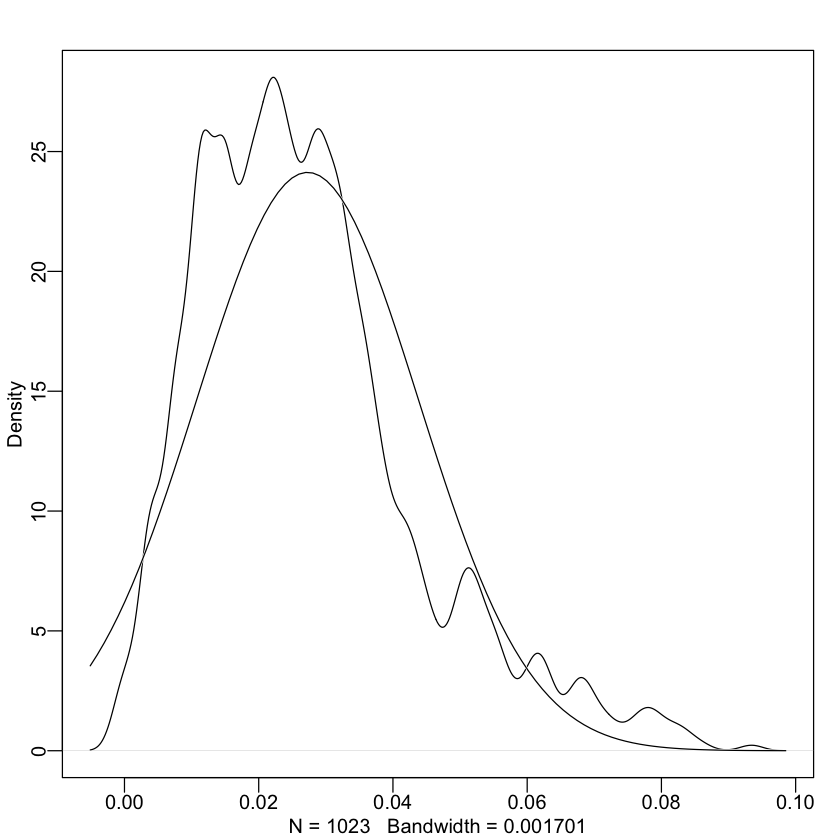

In [51]:
# Create a new token that reflects the rate of all 1st person pronouns relative to total tokens
df2$fppAllRate <- df2$fppAll_Ct/df2$totalTokens
summary(df2$fppAllRate)
dens(df2$fppAllRate,norm.comp=TRUE)
sd(df2$fppAllRate)

,min,mean,max,sd
,<dbl>,<dbl>,<dbl>,<dbl>
D0003,0.000000000,0.05628796,0.09342561,0.01688380
D0009,0.007092199,0.03230725,0.08041958,0.01440364
D0002,0.000000000,0.02508714,0.06007067,0.01067975
D0007,0.000000000,0.01880837,0.07835821,0.01289728


Picking joint bandwidth of 0.00387

Saving 7 x 7 in image
Picking joint bandwidth of 0.00387



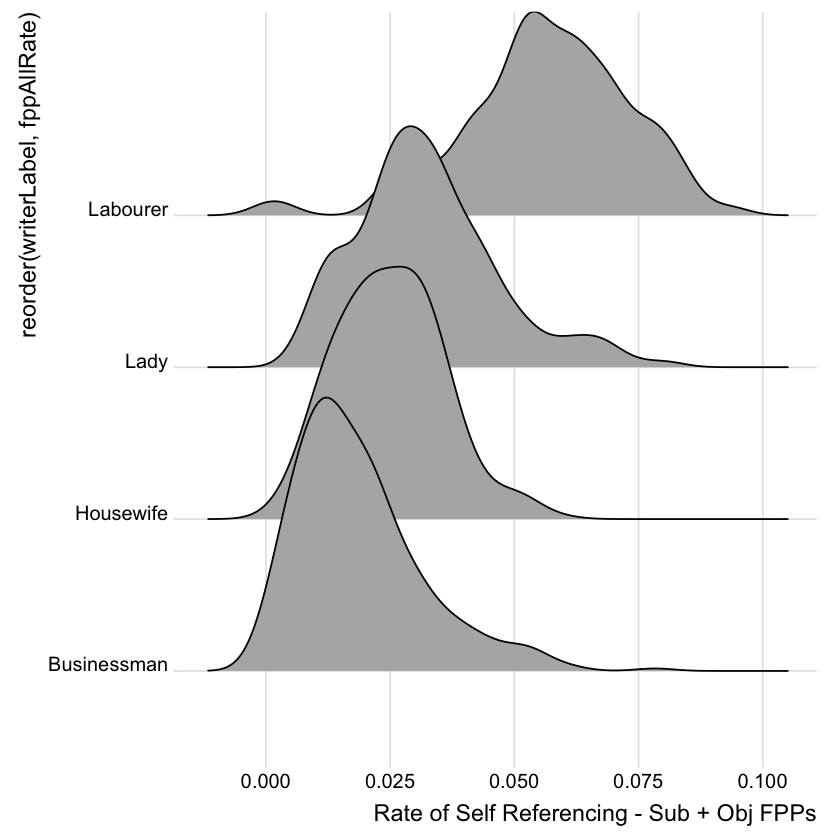

In [57]:
fppAllRate <- df2 %>% 
select(docid, fppAllRate) %>% 
group_by(docid) %>% 
summarize(min = min(fppAllRate),
          mean = mean(fppAllRate), 
          max = max(fppAllRate), 
          sd = sd(fppAllRate)) %>%
column_to_rownames(var = "docid") %>%
arrange(desc(mean))

fppAllRate


actualData <- df2 %>% 
select(docid, fppAllRate) 

actualData$writerLabel[actualData$docid=="D0002"] <- "Housewife"
actualData$writerLabel[actualData$docid=="D0003"] <- "Labourer"
actualData$writerLabel[actualData$docid=="D0007"] <- "Businessman"
actualData$writerLabel[actualData$docid=="D0009"] <- "Lady"

ggplot(actualData, aes(x = fppAllRate, y = reorder(writerLabel, fppAllRate))) +
  geom_density_ridges() +
theme_ridges() + 
  theme(legend.position = "none") + 
xlab("Rate of Self Referencing - Sub + Obj FPPs")

ggsave("20241213_FPA_actual-dist.jpg")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.01111 0.01845 0.02189 0.02827 0.07958 

[1] 0.01506564

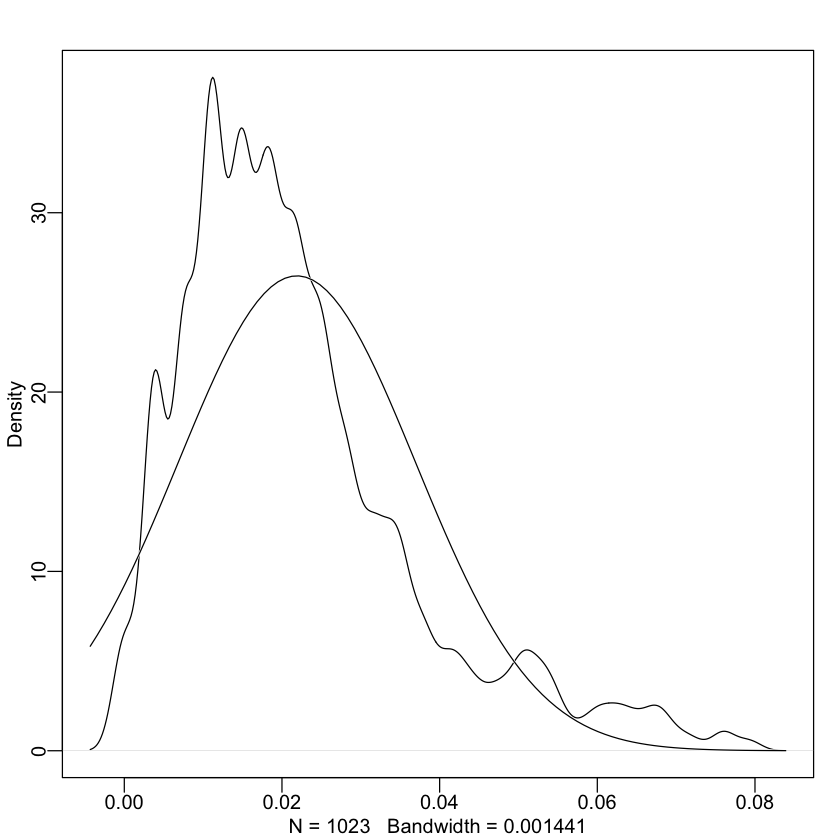

In [55]:
# Create a new token that reflects the rate of subjective first person pronouns to total tokens
df2$fppSubRate <- df2$fppSub_Ct/df2$totalTokens
summary(df2$fppSubRate)
dens(df2$fppSubRate,norm.comp=TRUE)
sd(df2$fppSubRate)

,min,mean,max,sd
,<dbl>,<dbl>,<dbl>,<dbl>
D0003,0.000000000,0.05094633,0.07958478,0.015660164
D0009,0.007092199,0.02845712,0.06405694,0.012211898
D0002,0.000000000,0.01845463,0.05154639,0.008536596
D0007,0.000000000,0.01441080,0.05514706,0.010625662


Picking joint bandwidth of 0.00334

Saving 7 x 7 in image
Picking joint bandwidth of 0.00334



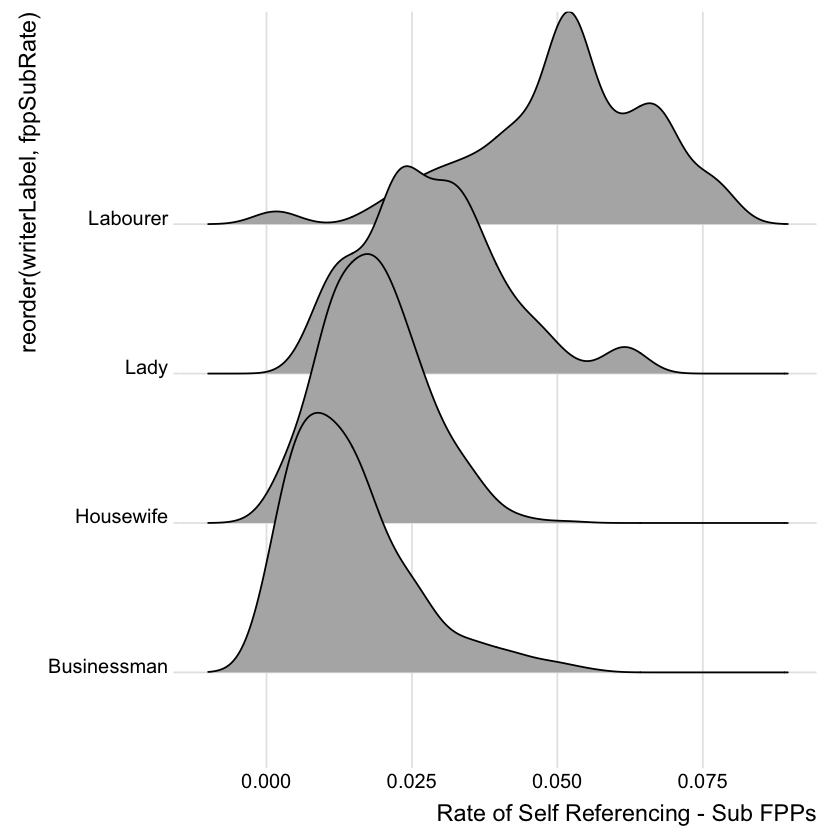

In [58]:
fppSubRate <- df2 %>% 
select(docid, fppSubRate) %>% 
group_by(docid) %>% 
summarize(min = min(fppSubRate),
          mean = mean(fppSubRate), 
          max = max(fppSubRate), 
          sd = sd(fppSubRate)) %>%
column_to_rownames(var = "docid") %>%
arrange(desc(mean))

fppSubRate


actualData <- df2 %>% 
select(docid, fppSubRate) 

actualData$writerLabel[actualData$docid=="D0002"] <- "Housewife"
actualData$writerLabel[actualData$docid=="D0003"] <- "Labourer"
actualData$writerLabel[actualData$docid=="D0007"] <- "Businessman"
actualData$writerLabel[actualData$docid=="D0009"] <- "Lady"

ggplot(actualData, aes(x = fppSubRate, y = reorder(writerLabel, fppSubRate))) +
  geom_density_ridges() +
theme_ridges() + 
  theme(legend.position = "none") + 
xlab("Rate of Self Referencing - Sub FPPs")

ggsave("20241213_FPS_actual-dist.jpg")

In [22]:
## Check Data and Save

In [23]:
glimpse(df2)

Rows: 1,023
Columns: 47
$ docid            <fct> D0002, D0002, D0002, D0002, D0002, D0002, D0002, D000…
$ docyear          <int> 1883, 1883, 1883, 1883, 1883, 1883, 1883, 1883, 1883,…
$ docmonth         <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ authorName       <fct> Anne F. Richards, Anne F. Richards, Anne F. Richards,…
$ docauthorid      <fct> D0002, D0002, D0002, D0002, D0002, D0002, D0002, D000…
$ authorLocation   <fct> Australia, Australia, Australia, Australia, Australia…
$ authorGender     <fct> F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, F,…
$ nationalOrigin   <fct> English, English, English, English, English, English,…
$ irish            <fct> False, False, False, False, False, False, False, Fals…
$ otherUK          <fct> True, True, True, True, True, True, True, True, True,…
$ relMin           <fct> False, False, False, False, False, False, False, Fals…
$ catholic         <fct> False, False, False, False, False, False, False, Fals…
$ otherChristian

In [26]:
write.csv(df2, "20241010_PhD_DiaChk-RQ1a.csv", row.names=FALSE)